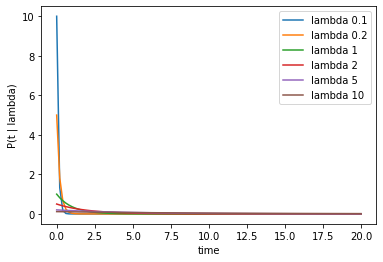

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

# the exponential pdf
# P(t| lamb) = exp^{-t/lamb} / Z(lamb, a, b)
#
def expon_pdf(t, lamb, a, b):
    z = lamb * (np.exp(-a/lamb) - np.exp(-b/lamb))
    pdf = np.exp(-t/lamb)/z
    return pdf

# the exponential cdf
# F(t| lamb) = int_{a}^{t} exp^{-t/lamb} / Z(lamb, a, b)
# F(t| lamb) = Z(lamb, a, t) / Z(lamb, a, b)
#
def expon_cdf(t, lamb, a, b):
    z   = lamb * (np.exp(-a/lamb) - np.exp(-b/lamb))
    num = lamb * (np.exp(-a/lamb) - np.exp(-t/lamb))
    cdf = num/z
    return cdf

a = 0
b = 20
t = np.linspace(a, b, 100)

p01 = expon_pdf(t,  0.1, a, b) # lambda = 0.1
p02 = expon_pdf(t,  0.2, a, b) # lambda = 0.2
p1  = expon_pdf(t,  1,   a, b) # lambda = 1
p2  = expon_pdf(t,  2,   a, b) # lambda = 2
p5  = expon_pdf(t,  5,   a, b) # lambda = 5
p10 = expon_pdf(t, 10,   a, b) # lambda = 10

plt.plot(t, p01,  label='lambda 0.1')
plt.plot(t, p02,  label='lambda 0.2')
plt.plot(t,  p1,  label='lambda 1')
plt.plot(t,  p2,  label='lambda 2')
plt.plot(t,  p5,  label='lambda 5')
plt.plot(t, p10,  label='lambda 10')
plt.legend(loc="upper right")
plt.xlabel("time")
plt.ylabel("P(t | lambda)")
plt.show()

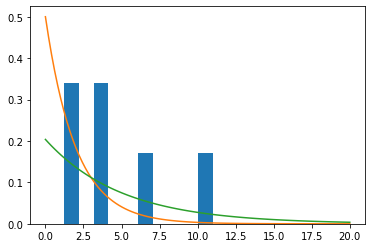

In [3]:
# LOOK AT DATA
data = [1.2, 2.1, 3.4, 4.1, 7, 11]

plt.hist(data,density=True)
plt.plot(t,  p2,  label='lambda 2')
plt.plot(t,  p5,  label='lambda 5')


N =  6 data mean 4.8 posterior max 5.264204204204204


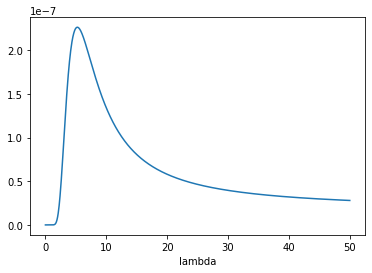

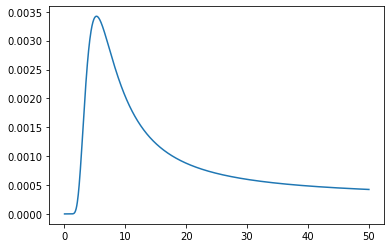

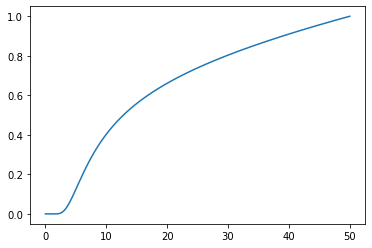

In [4]:
lamb_min = 0.01
lamb_max = 50
nbin     = 1000
lamb     = np.linspace(lamb_min, lamb_max, nbin)
bsize    = (lamb_max-lamb_min)/nbin

# the likelihood function
#
def likelihood(lamb, data, a, b):
    like = []
    
    for x in range(len(lamb)):  # for each lambda, calculate the likelihood (thislike)
        
        thisl = lamb[x] # the value of lambda
        
        thislike = 1 # initialzie the likelihood to 1
        for d in range(len(data)):
            # multiply the prob of all data points
            thislike *= expon_pdf(data[d], thisl, a, b)   
            #print("P of data", thislike, "for lambda", thisl)
            
        like.append(thislike) # store this likelihood
    return like

# the data in the lecture notes
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(lamb, data, a, b)
print("N = ", len(data), 
      "data mean", np.mean(data), 
      "posterior max", lamb[np.argmax(like)])
plt.plot(lamb, like)
plt.xlabel("lambda")
plt.show()

pdf_lambda_posterior = like/np.sum(like)
plt.plot(lamb, pdf_lambda_posterior)
plt.show()

cdf_lambda_posterior = np.cumsum(pdf_lambda_posterior)
plt.plot(lamb, cdf_lambda_posterior)
plt.show()


N =  1 data mean 1.2 posterior max 1.210960960960961


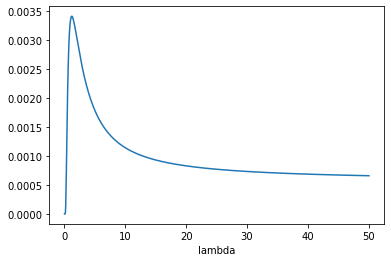

In [5]:
# only one data point!
# and you already get a bump!
#
data = [1.2]
like = likelihood(lamb, data, a, b)
print("N = ", len(data), 
      "data mean", np.mean(data), 
      "posterior max", lamb[np.argmax(like)])

# using a uniform prior
pdf_lambda_posterior = like/np.sum(like)

plt.plot(lamb, pdf_lambda_posterior)
plt.xlabel("lambda")
plt.show()



N =  12 data mean 4.8 posterior max 5.264204204204204


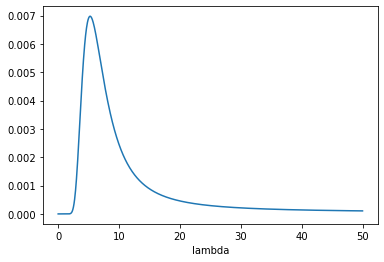

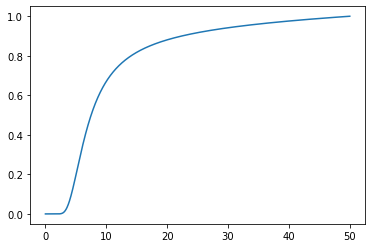

In [6]:
# add more data with same mean
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(lamb, data, a, b)
print("N = ", len(data), 
      "data mean", np.mean(data), 
      "posterior max", lamb[np.argmax(like)])

pdf_lambda_posterior = like/np.sum(like)

plt.plot(lamb, pdf_lambda_posterior)
plt.xlabel("lambda")
plt.show()

cdf_lambda_posterior = np.cumsum(pdf_lambda_posterior)
plt.plot(lamb, cdf_lambda_posterior)
plt.show()


N =  18 data mean 4.8 posterior max 5.264204204204204


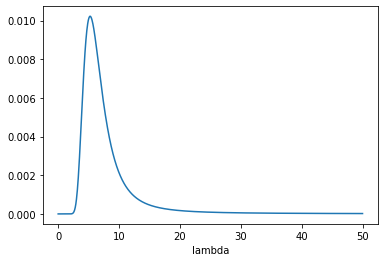

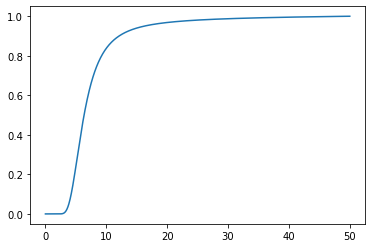

In [7]:
# even more data with same mean
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(lamb, data, a, b)
print("N = ", len(data), 
      "data mean", np.mean(data), 
      "posterior max", lamb[np.argmax(like)])

pdf_lambda_posterior = like/np.sum(like)

plt.plot(lamb, pdf_lambda_posterior)
plt.xlabel("lambda")
plt.show()

cdf_lambda_posterior = np.cumsum(pdf_lambda_posterior)
plt.plot(lamb, cdf_lambda_posterior)
plt.show()


N =  54 data mean 4.799999999999999 posterior max 5.264204204204204


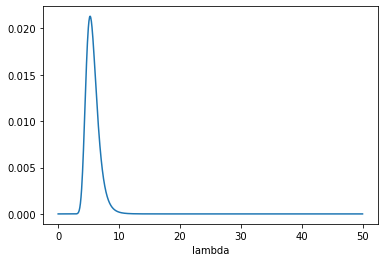

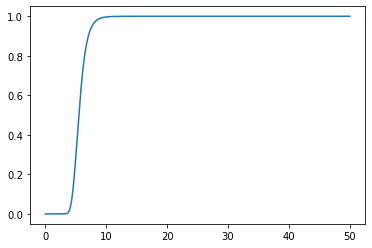

In [8]:
# alot more data with the same mean
#
data = [1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11, 
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11,
        1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(lamb, data, a, b)
print("N = ", len(data), "data mean", np.mean(data), 
    "posterior max", lamb[np.argmax(like)])

pdf_lambda_posterior = like/np.sum(like)

plt.plot(lamb, pdf_lambda_posterior)
plt.xlabel("lambda")
plt.show()

cdf_lambda_posterior = np.cumsum(pdf_lambda_posterior)
plt.plot(lamb, cdf_lambda_posterior)
plt.show()


N =  3 data mean 143.36666666666667 posterior max 50.0


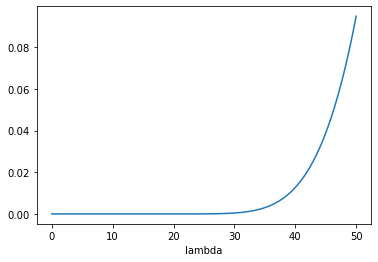

In [9]:
# some weird data.
# Is the exponential distribution a good model for this data?
#
lamb = np.linspace(0.01, 50, 100)
data = [0.1,30,400]
like = likelihood(lamb, data, a, b)
print("N = ", len(data), 
      "data mean", np.mean(data), 
      "posterior max", lamb[np.argmax(like)])

pdf_lambda_posterior = like/np.sum(like)

plt.plot(lamb, pdf_lambda_posterior)
plt.xlabel("lambda")
plt.show()


N =  6 data mean 4.8 posterior max 0.01


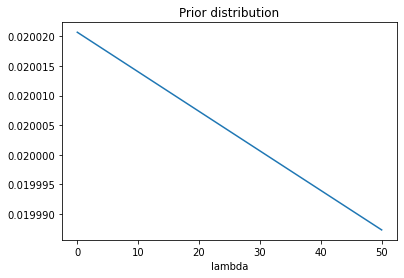

N =  6 data mean 4.8 posterior max 5.059494949494949


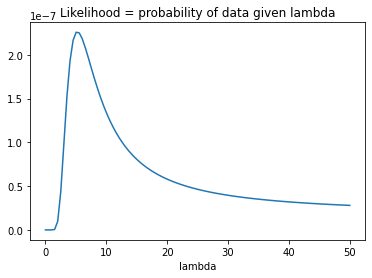

N =  6 data mean 4.8 posterior max 5.059494949494949


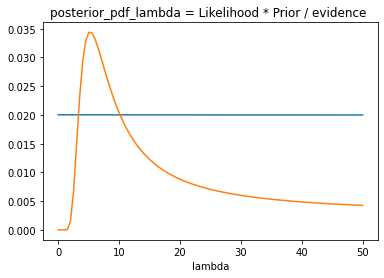

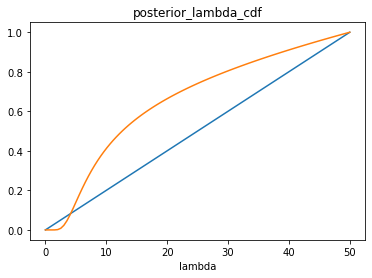

In [13]:
# what happens when you add a more informative prior for lambda
#
# Someone tells you in previous experiments the mean of the wait times from previous experiments
#

# the prior
prev_mean = 8
prev_mean = 1
prev_mean = 30000
prior_pdf = expon_pdf(lamb, prev_mean, lamb_min, lamb_max)
prior_cdf = expon_cdf(lamb, prev_mean, lamb_min, lamb_max)

# the probability of the data given lambda
data = [1.2, 2.1, 3.4, 4.1, 7, 11]
like = likelihood(lamb, data, a, b)

# the posterior pdf of lambda given data and prior
pdf_lambda_posterior = like * prior_pdf 
pdf_lambda_posterior = pdf_lambda_posterior/np.sum(pdf_lambda_posterior)

print("N = ", len(data), 
      "data mean", np.mean(data), 
      "posterior max", lamb[np.argmax(prior_pdf)])
plt.plot(lamb, prior_pdf)
plt.title("Prior distribution")
plt.xlabel("lambda")
plt.show()

print("N = ", len(data), 
      "data mean", np.mean(data), 
      "posterior max", lamb[np.argmax(like)])
plt.plot(lamb, like)
plt.title("Likelihood = probability of data given lambda")
plt.xlabel("lambda")
plt.show()

print("N = ", len(data), 
      "data mean", np.mean(data), 
      "posterior max", lamb[np.argmax(pdf_lambda_posterior)])
plt.plot(lamb, prior_pdf)
#plt.plot(lamb, like)
plt.plot(lamb, pdf_lambda_posterior)
plt.title("posterior_pdf_lambda = Likelihood * Prior / evidence ")
plt.xlabel("lambda")
plt.show()

cdf_lambda_posterior = np.cumsum(pdf_lambda_posterior)
plt.plot(lamb, prior_cdf)
plt.plot(lamb, cdf_lambda_posterior)
plt.title("posterior_lambda_cdf")
plt.xlabel("lambda")
plt.show()
